In [1]:
import graphlab
import math
import random
import numpy
from matplotlib import pyplot as plt
%matplotlib inline


In [3]:
#create random values for x in interval [0,1]
random.seed(98103)
n = 30
x = graphlab.SArray([random.random() for i in range(n)]).sort() #so that they increase over time and therefore we can fit linear regression

In [4]:
x

dtype: float
Rows: 30
[0.03957894495006575, 0.04156809967912256, 0.0724319480800758, 0.1502890446221763, 0.16133414450223427, 0.19195631279497838, 0.23283391714465285, 0.25990098016580054, 0.3801458148686865, 0.432444723507992, 0.47056698189428126, 0.4714946037956341, 0.47870640066103853, 0.49053553924712967, 0.5467800590828905, 0.5696803579782542, 0.6079324536462045, 0.6202375373443129, 0.630093133764472, 0.6450096693254694, 0.6467576040906915, 0.6990897790220533, 0.7902450464374043, 0.8103846511814395, 0.829320894073608, 0.8501115576007019, 0.8863684369527574, 0.8911410794245727, 0.9043884813966695, 0.9244858666003654]

In [5]:
#computing y which is a sinusoidal function of x
y = x.apply(lambda x: math.sin(4*x))

In [6]:
#adding some random gaussian noise to y
random.seed(1)
e = graphlab.SArray([random.gauss(0,1.0/3.0) for i in range(n)])


In [7]:
e

dtype: float
Rows: 30
[0.4293949177184876, 0.48314853623325693, 0.022111936312753967, -0.25484788365721056, -0.3640577383680471, 0.010444838943905622, -0.34070105667029094, -0.47894314836750995, 0.06643732549458461, 0.04445820155286828, 0.18215610011274386, -0.3046569812451042, 0.001668427875524148, -0.021580586790895962, -0.5019430004202472, 0.17933239288701125, 0.10690370033294941, 0.7963706810802287, 0.06765639243665474, -0.04823410272164017, 0.41091905834297454, 0.06626374939780849, 0.3030103420510697, -0.12184808874417226, 0.07272393778686082, 0.34142955949567266, 0.23208234081765383, 0.042824082877618797, -0.36076934153201484, 0.14840725745368283]

In [8]:
y = y + e

In [9]:
#putting the above data into a sframe to manipulate later
data = graphlab.SFrame({"X1":x,"Y":y})

In [10]:
data

X1,Y
0.0395789449501,0.587050191026
0.0415680996791,0.648655851372
0.0724319480801,0.307803309485
0.150289044622,0.310748447417
0.161334144502,0.237409625496
0.191956312795,0.705017157224
0.232833917145,0.461716676992
0.259900980166,0.383260507851
0.380145814869,1.06517691429
0.432444723508,1.03184706949


In [11]:
#creating a function to plot the data
def plot_data(data):
    plt.plot(data["X1"], data["Y"],"k.")
    plt.xlabel("x")
    plt.ylabel("y")

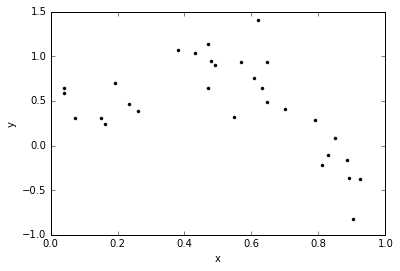

In [12]:
plot_data(data)

In [13]:
#defining a function to creating features for a polynomial regression model of any degree
def polynomial_features(data,deg):
    data_copy = data.copy()
    for i in range(1,deg):
        data_copy["X"+str(i+1)] = data_copy["X"+str(i)]*data_copy["X1"]
    return data_copy

In [14]:
#lets see what this function did
polynomial_features(data,2)

X1,Y,X2
0.0395789449501,0.587050191026,0.00156649288336
0.0415680996791,0.648655851372,0.00172790691093
0.0724319480801,0.307803309485,0.00524638710267
0.150289044622,0.310748447417,0.0225867969334
0.161334144502,0.237409625496,0.0260287061823
0.191956312795,0.705017157224,0.0368472260218
0.232833917145,0.461716676992,0.0542116329729
0.259900980166,0.383260507851,0.0675485194911
0.380145814869,1.06517691429,0.144510840562
0.432444723508,1.03184706949,0.18700843889


In [15]:
polynomial_features(data,4)

X1,Y,X2,X3,X4
0.0395789449501,0.587050191026,0.00156649288336,6.20001355952e-05,2.45389995362e-06
0.0415680996791,0.648655851372,0.00172790691093,7.18258067099e-05,2.98566229285e-06
0.0724319480801,0.307803309485,0.00524638710267,0.000380006038229,2.75245776311e-05
0.150289044622,0.310748447417,0.0225867969334,0.0033945481322,0.000510163395713
0.161334144502,0.237409625496,0.0260287061823,0.00419931904442,0.000677493545523
0.191956312795,0.705017157224,0.0368472260218,0.00707305764388,0.0013577180655
0.232833917145,0.461716676992,0.0542116329729,0.0126223068599,0.00293890114959
0.259900980166,0.383260507851,0.0675485194911,0.0175559264245,0.00456280248545
0.380145814869,1.06517691429,0.144510840562,0.0549351912429,0.02088338304
0.432444723508,1.03184706949,0.18700843889,0.0808708126494,0.034972156216


In [16]:
#defining a function to fit a polynomial linear regression model of degree that was specified earlier
def polynomial_regression(data,deg):
    model = graphlab.linear_regression.create(polynomial_features(data,deg), target = "Y",l2_penalty = 0., l1_penalty = 0.,
                                             validation_set = None, verbose = False)
    return model

    

In [17]:
#checking the above function
polynomial_regression(data,3)

Class                          : LinearRegression

Schema
------
Number of coefficients         : 4
Number of examples             : 30
Number of feature columns      : 3
Number of unpacked features    : 3

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.0

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 3.1317

Settings
--------
Residual sum of squares        : 1.8154
Training RMSE                  : 0.246

Highest Positive Coefficients
-----------------------------
X2                             : 7.3918
(intercept)                    : 0.468

Lowest Negative Coefficients
----------------------------
X3                             : -8.5043
X1                             : -0.7994

In [18]:
#defining a function to plot data and predictions made
def plot_poly_predictions(data, model):
    plot_data(data)
    
    #getting the degree of polynomial
    deg = len(model.coefficients["value"]) - 1
    
    #creating 200 points in the x axis and compute the predictions for each point
    x_pred = graphlab.SFrame({"X1":[i/200.0 for i in range(200)]})
    y_pred = model.predict(polynomial_features(x_pred,deg))
    
    #plot predictions
    plt.plot(x_pred["X1"], y_pred,"g-", label = "degree" + str(deg) + " fit")
    plt.legend(loc="upper left")
    plt.axis([0,1,-1.5,2])

In [19]:
#defining a function that prints the polynomial coefficients in a pretty way
def print_coefficients(model):
    deg = len(model.coefficients["value"]) - 1
    #getting the learned parameters as a list
    w = list(model.coefficients["value"])
    print "Learned polynomial for degree " + str(deg) + ":"
    w.reverse()
    print numpy.poly1d(w)

In [20]:
#fitting a two degree polynomial
model = polynomial_regression(data,deg=2)


In [21]:
print_coefficients(model)

Learned polynomial for degree 2:
        2
-5.129 x + 4.147 x + 0.07471


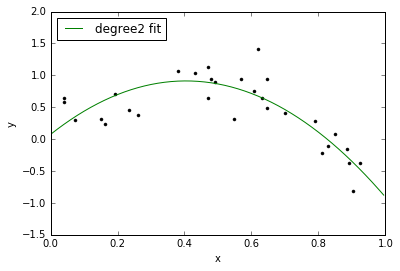

In [22]:
plot_poly_predictions(data,model)

In [23]:
#fitting a fourth degree polynomial
model = polynomial_regression(data,deg=4)

In [24]:
print_coefficients(model)

Learned polynomial for degree 4:
       4         3         2
23.87 x - 53.82 x + 35.23 x - 6.828 x + 0.7755


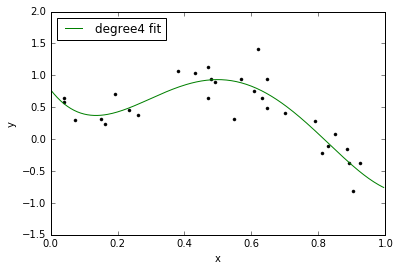

In [25]:
plot_poly_predictions(data,model)

In [26]:
#fitting a degree 16 polynomial
model = polynomial_regression(data,deg = 16)

In [27]:
print_coefficients(model)

Learned polynomial for degree 16:
            16             15             14            13
-4.537e+05 x  + 1.129e+06 x  + 4.821e+05 x  - 3.81e+06 x 
              12             11             10             9
 + 3.536e+06 x  + 5.753e+04 x  - 1.796e+06 x  + 2.178e+06 x
              8             7            6             5             4
 - 3.662e+06 x + 4.442e+06 x - 3.13e+06 x + 1.317e+06 x - 3.356e+05 x
             3        2
 + 5.06e+04 x - 4183 x + 160.8 x - 1.621


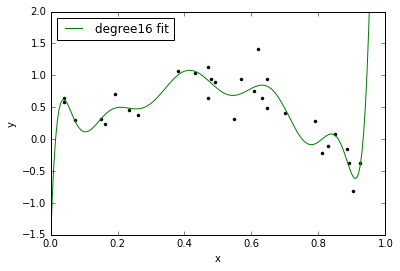

In [28]:
plot_poly_predictions(data,model)

#ridge regression

In [29]:
#defining a function to solve the ridge objective for a polynomial regression model of any degree
def polynomial_ridge_regression(data,deg,l2_penalty):
    model = graphlab.linear_regression.create(polynomial_features(data,deg), target = "Y",l2_penalty = l2_penalty, validation_set=None, verbose=False)
    return model

In [30]:
#performing a ridge fit of a 16 degree polynomial using a very small penalty strength
model = polynomial_ridge_regression(data,deg = 16,l2_penalty=100)

In [31]:
print_coefficients(model)

Learned polynomial for degree 16:
        16          15          14          13          12         11
-0.301 x  - 0.2802 x  - 0.2604 x  - 0.2413 x  - 0.2229 x  - 0.205 x 
           10          9          8          7          6           5
 - 0.1874 x  - 0.1699 x - 0.1524 x - 0.1344 x - 0.1156 x - 0.09534 x
            4           3           2
 - 0.07304 x - 0.04842 x - 0.02284 x - 0.002257 x + 0.6416


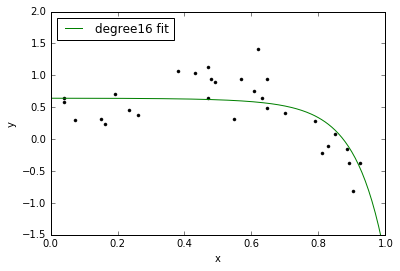

In [32]:
plot_poly_predictions(data,model)

lambda = 1.00e-25
Learned polynomial for degree 16:
            16             15             14            13
-4.537e+05 x  + 1.129e+06 x  + 4.821e+05 x  - 3.81e+06 x 
              12             11             10             9
 + 3.536e+06 x  + 5.753e+04 x  - 1.796e+06 x  + 2.178e+06 x
              8             7            6             5             4
 - 3.662e+06 x + 4.442e+06 x - 3.13e+06 x + 1.317e+06 x - 3.356e+05 x
             3        2
 + 5.06e+04 x - 4183 x + 160.8 x - 1.621


lambda = 1.00e-10
Learned polynomial for degree 16:
           16             15             14             13
4.975e+04 x  - 7.821e+04 x  - 2.265e+04 x  + 3.949e+04 x 
              12        11             10             9             8
 + 4.366e+04 x  + 3074 x  - 3.332e+04 x  - 2.786e+04 x + 1.032e+04 x
              7        6             5             4        3         2
 + 2.962e+04 x - 1440 x - 2.597e+04 x + 1.839e+04 x - 5596 x + 866.1 x - 65.19 x + 2.159


lambda = 1.00e-06
Learned polyn

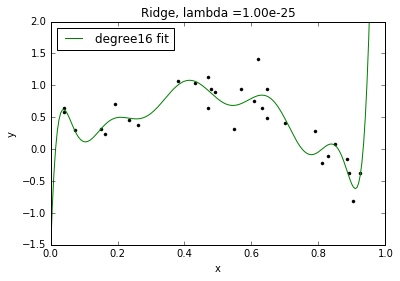

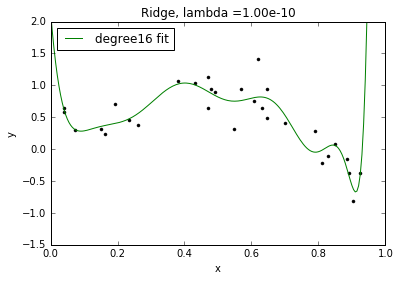

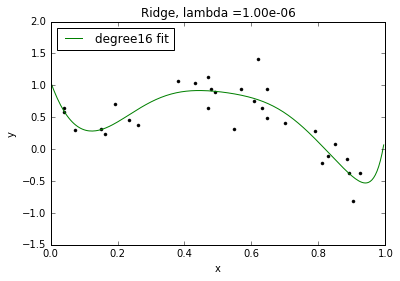

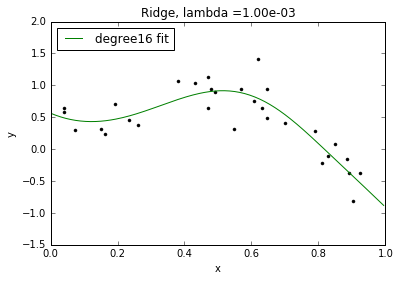

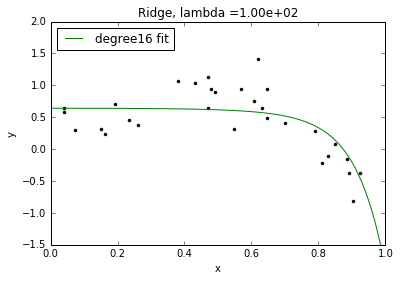

In [33]:
#let's look at fits for a sequence of increasing lambda values
for l2_penalty in [1e-25,1e-10,1e-6,1e-3,1e2]:
    model = polynomial_ridge_regression(data,deg=16,l2_penalty = l2_penalty)
    print "lambda = %.2e" %l2_penalty
    print_coefficients(model)
    print "\n"
    plt.figure()
    plot_poly_predictions(data,model)
    plt.title("Ridge, lambda =%.2e" % l2_penalty)

In [34]:
data

X1,Y
0.0395789449501,0.587050191026
0.0415680996791,0.648655851372
0.0724319480801,0.307803309485
0.150289044622,0.310748447417
0.161334144502,0.237409625496
0.191956312795,0.705017157224
0.232833917145,0.461716676992
0.259900980166,0.383260507851
0.380145814869,1.06517691429
0.432444723508,1.03184706949


In [40]:
#perform a ridge fit of a 16 degree polynomial using a good penalty strenth
#using leave one out(LOO) cross validation which approximates average mean square error
def loo(data, deg, l2_penalty_values):
    # Create polynomial features
    data = polynomial_features(data, deg)
    
    # Create as many folds for cross validatation as number of data points
    num_folds = len(data)
    folds = graphlab.cross_validation.KFold(data,num_folds)
    
    # for each value of l2_penalty, fit a model for each fold and compute average MSE
    l2_penalty_mse = []
    min_mse = None
    best_l2_penalty = None
    for l2_penalty in l2_penalty_values:
        next_mse = 0.0
        for train_set, validation_set in folds:
            # train model
            model = graphlab.linear_regression.create(train_set,target='Y', 
                                                      l2_penalty=l2_penalty,
                                                      validation_set=None,verbose=False)
            
            # predict on validation set 
            y_test_predicted = model.predict(validation_set)
            # compute squared error
            next_mse += ((y_test_predicted-validation_set['Y'])**2).sum()
        
        # save squared error in list of MSE for each l2_penalty
        next_mse = next_mse/num_folds
        l2_penalty_mse.append(next_mse)
        if min_mse is None or next_mse < min_mse:
            min_mse = next_mse
            best_l2_penalty = l2_penalty
            
    return l2_penalty_mse,best_l2_penalty

In [41]:
#running loo cross validation for num values of lambda on a log scale
l2_penalty_values = numpy.logspace(-4,10,num=10)
l2_penalty_mse, best_l2_penalty = loo(data,16, l2_penalty_values)

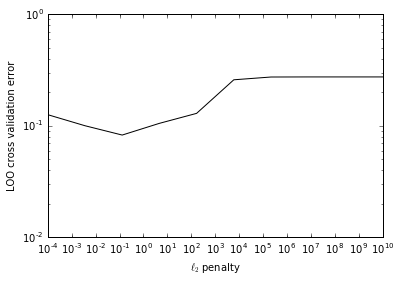

In [42]:
#plot results of estimating LOO for each value of lambda
plt.plot(l2_penalty_values, l2_penalty_mse,"k-")
plt.xlabel("$\ell_2$ penalty")
plt.ylabel("LOO cross validation error")
plt.xscale("log")
plt.yscale("log")

In [43]:
best_l2_penalty

0.12915496650148839

In [44]:
model = polynomial_ridge_regression(data, deg = 16, l2_penalty = best_l2_penalty)

In [45]:
print_coefficients(model)

Learned polynomial for degree 16:
       16         15          14          13          12           11
1.345 x  + 1.141 x  + 0.9069 x  + 0.6447 x  + 0.3569 x  + 0.04947 x 
           10          9          8         7         6         5
 - 0.2683 x  - 0.5821 x - 0.8701 x - 1.099 x - 1.216 x - 1.145 x
           4           3          2
 - 0.7837 x - 0.07406 x + 0.7614 x + 0.7703 x + 0.3918


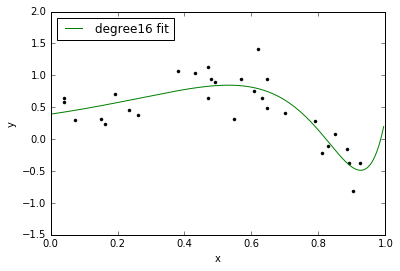

In [46]:
plot_poly_predictions(data, model)

In [47]:
#lasso regression
def polynomial_lasso_regression(data,deg,l1_penalty):
    model = graphlab.linear_regression.create(polynomial_features(data,deg), target = "Y", l2_penalty=0., l1_penalty = l1_penalty,
                                             validation_set = None, verbose=False, max_iterations = 3000, convergence_threshold=1e-10)
    return model

l1_penalty = 1.000000e-04
Number of nonzeros = 17
Learned polynomial for degree 16:
       16        15         14         13         12         11
29.02 x  + 1.35 x  - 12.72 x  - 16.93 x  - 13.82 x  - 6.698 x 
          10         9         8         7         6         5
 + 1.407 x  + 8.939 x + 12.88 x + 11.44 x + 3.759 x - 8.062 x
          4         3         2
 - 16.28 x - 7.682 x + 17.86 x - 4.384 x + 0.685


l1_penalty = 1.000000e-02
Number of nonzeros = 13
Learned polynomial for degree 16:
       16            15           11          10         9          8
-1.18 x  - 0.002259 x  + 0.08773 x  + 0.7392 x  + 3.829 x + 0.4765 x
           7          5         4             3         2
 + 0.1287 x - 0.6147 x - 10.11 x - 0.0003958 x + 6.686 x - 1.28 x + 0.5056


l1_penalty = 1.000000e-01
Number of nonzeros = 5
Learned polynomial for degree 16:
      16         6         5
2.21 x  - 1.002 x - 2.962 x + 1.216 x + 0.3473


l1_penalty = 1.000000e+01
Number of nonzeros = 2
Learned polyn

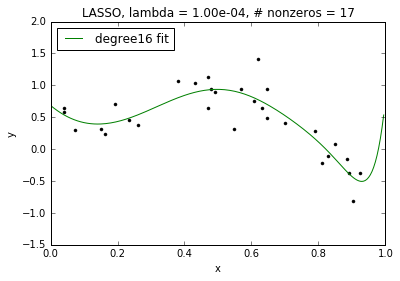

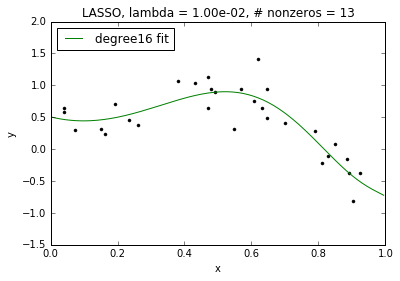

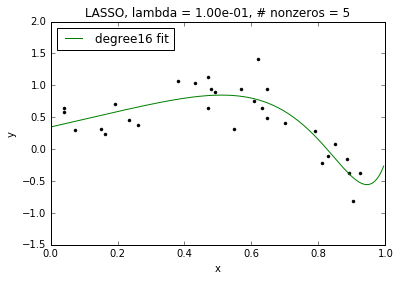

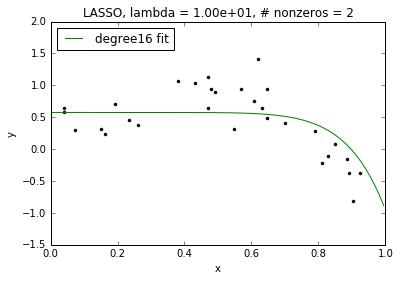

In [49]:
#exploring the lasso function as a function of a few different penalty strengths
for l1_penalty in [0.0001, 0.01,0.1,10]:
    model = polynomial_lasso_regression(data, deg=16, l1_penalty = l1_penalty)
    print "l1_penalty = %e" % l1_penalty
    print "Number of nonzeros = %d" %(model.coefficients["value"]).nnz()
    print_coefficients(model)
    print "\n"
    plt.figure()
    plot_poly_predictions(data, model)
    plt.title('LASSO, lambda = %.2e, # nonzeros = %d' % (l1_penalty, (model.coefficients['value']).nnz()))  